In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import File & Initial Check

In [3]:
df1 = pd.read_csv('./data/AsianRestaurant_Cyprus_2018.txt', sep=';')

In [4]:
df2 = pd.read_csv('./data/AsianRestaurant_Cyprus_2018_partial.txt', sep=';')

In [5]:
df1.head()

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
0,110000012018,SWEETCORN SOUP,SOUPS,2.0,"12,00",2018-01-01 21:47:27.000,2,0,2,0,NaN,NaN
1,110000012018,SPRING ROLL,STARTERS,2.0,"5,80",2018-01-01 21:47:27.000,2,0,2,0,NaN,NaN
2,110000012018,EGG FRIED RICE,RICE,1.0,"6,90",2018-01-01 21:47:27.000,2,0,2,0,NaN,NaN
3,110000012018,SWEET SOUR CHICKEN,MEAT,1.0,"12,60",2018-01-01 21:47:27.000,2,0,2,0,NaN,NaN
4,110000012018,LAMB ROGAN JOSH,MAIN IND,1.0,"14,60",2018-01-01 21:47:27.000,2,0,2,0,NaN,NaN


In [6]:
df1.shape

(84109, 12)

In [7]:
df2.head()

,DocNumber,ProductDesignation
0,110000012018,SWEETCORN SOUP
1,110000012018,SPRING ROLL
2,110000012018,EGG FRIED RICE
3,110000012018,SWEET SOUR CHICKEN
4,110000012018,LAMB ROGAN JOSH


In [76]:
df1.dtypes

DocNumber               int64
ProductDesignation     object
ProductFamily          object
Qty                   float64
TotalAmount            object
InvoiceDateHour        object
EmployeeID              int64
IsDelivery              int64
Pax                     int64
CustomerID              int64
CustomerCity           object
CustomerSince          object
dtype: object

In [259]:
#corrigir o tipo do Total
#df1[["TotalAmount "]] = df1[["TotalAmount"]].apply(pd.to_numeric)
#df1.TotalAmount.stack().str.replace(',','.').unstack()
df1.TotalAmount=df1.TotalAmount.apply(lambda x:float(str( x.replace(',','.'))))

In [260]:
df1.dtypes

DocNumber               int64
ProductDesignation     object
ProductFamily          object
Qty                   float64
TotalAmount           float64
InvoiceDateHour        object
EmployeeID              int64
IsDelivery              int64
Pax                     int64
CustomerID              int64
CustomerCity           object
CustomerSince          object
dtype: object

In [77]:
#numéricas
df1.describe()

,DocNumber,Qty,EmployeeID,IsDelivery,Pax,CustomerID
count,8.410900e+04,84109.000000,84109.000000,84109.000000,84109.000000,84109.000000
mean,1.884754e+11,1.261256,3.591221,0.371518,3.300800,12633.065760
std,1.005264e+11,0.923780,3.682017,0.483213,3.693792,21952.076038
min,1.100000e+11,1.000000,2.000000,0.000000,0.000000,0.000000
25%,1.100240e+11,1.000000,2.000000,0.000000,1.000000,0.000000
50%,1.100497e+11,1.000000,2.000000,0.000000,2.000000,0.000000
75%,3.200125e+11,1.000000,5.000000,1.000000,4.000000,16429.000000
max,3.200445e+11,53.000000,27.000000,1.000000,200.000000,69101.000000


In [78]:
df1.describe(include="object")

,ProductDesignation,ProductFamily,TotalAmount,InvoiceDateHour,CustomerCity,CustomerSince
count,84109,84109,84109,84109,31248,29142
unique,255,27,374,11146,17,2109
top,MINERAL WATER 1.5LT,STARTERS,"3,00",2018-12-24 22:59:54.000,EGKOMI,2005-12-06 15:00:00.000
freq,7061,14148,9733,46,9423,1164


255 Produtos diferentes
27 Familias
apenas 374 total ammounts diferentes?
17 cidades


## First Explore

In [11]:
# só customer city e customer since têm NULLS
# CustomerCity - 52 861
# CustomerSince - 54967
df1.isnull().sum()

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         54967
dtype: int64

In [13]:
df1.IsDelivery.value_counts()
# e parece que há um match do numero de nulls  com o de !Delivery

0    52861
1    31248
Name: IsDelivery, dtype: int64

In [85]:
#e verificando 
print(df1.loc[df1["IsDelivery"]>0, ].isnull().sum())
print(df1.loc[df1["IsDelivery"]==0, ].isnull().sum())


DocNumber                0
ProductDesignation       0
ProductFamily            0
Qty                      0
TotalAmount              0
InvoiceDateHour          0
EmployeeID               0
IsDelivery               0
Pax                      0
CustomerID               0
CustomerCity             0
CustomerSince         2106
dtype: int64
DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         52861
dtype: int64


Olhando para o DocNumber

In [41]:
# temos dados sobre 11 147 clientes --de facturas
df1['DocNumber'].nunique()


11147

In [55]:
# como cada linha na fatura é uma linha na df, é normal que haja várias rows para o mesmo invoice number
df1.DocNumber.value_counts()

#Vamos ter de brincar com isto mais uma vez - 
#provavelmente juntar linhas que são o mesmo produto somando as quantidades
#e depois calcular o total de cada factura
#depende um bocado do tipo de análises que queremos fazer.

DocNumber
110044742018    46
110053522018    46
110007092018    41
110054302018    40
110047272018    37
                ..
320033722018     1
320033942018     1
110001272018     1
110016842018     1
110020952018     1
Name: DocNumber, Length: 11147, dtype: int64

In [ ]:
Parecem existir facturas com numero elevado de items e facturas com apenas 1 item. Vamos ver:


In [229]:
df1["DocNumber"].value_counts().describe()

count    11147.000000
mean         7.545438
std          4.119032
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         46.000000
Name: DocNumber, dtype: float64

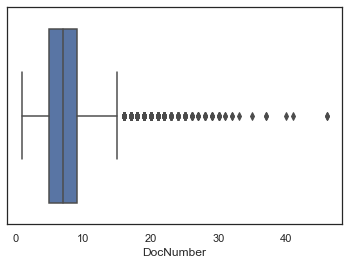

In [169]:
sns.boxplot(df1["DocNumber"].value_counts())

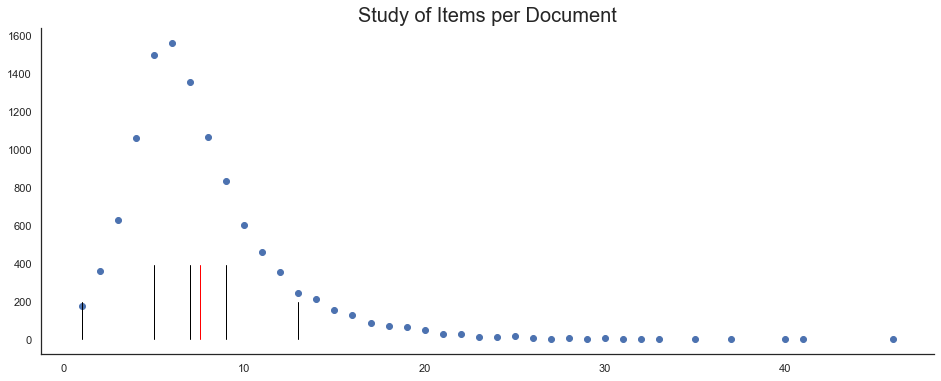

In [173]:
#E em gráficos

a=df1["DocNumber"].value_counts().describe()

maxval=df1["DocNumber"].value_counts().value_counts(ascending=True).values.max()
linwhismin=a[4]-(a[6]-a[4])
linwhismax=a[6]+(a[6]-a[4])

sns.set()
sns.set_style("white")
fig, ax1 = plt.subplots(1, figsize=(16,6))
ax1.scatter(df1["DocNumber"].value_counts().value_counts(ascending=True).index,df1["DocNumber"].value_counts().value_counts(ascending=True).values )

plt.plot([a[1],a[1]], [0, maxval/4],color="red", linewidth=1) #plot mean
plt.plot([linwhismin,linwhismin], [0, maxval/8],color="black", linewidth=1) #plot 1st whisker
plt.plot([a[4],a[4]], [0, maxval/4],color="black", linewidth=1) #plot 1st quart
plt.plot([a[5],a[5]], [0, maxval/4],color="black", linewidth=1) #plot median
plt.plot([a[6],a[6]], [0, maxval/4],color="black", linewidth=1) #plot 3rd quart

plt.plot([linwhismax,linwhismax], [0, maxval/8],color="black", linewidth=1) #plot 2nd whisker
ax2.boxplot(df1["DocNumber"].value_counts())
ax1.set_title("Study of Items per Document", fontsize=20)

sns.despine()
plt.show()





In [38]:
# DE clientes são:
df1["CustomerID"].nunique()

2316

In [39]:
#dos quais:
df1.groupby('IsDelivery')['CustomerID'].nunique()
# são quase todos de delivery...

IsDelivery
0       1
1    2315
Name: CustomerID, dtype: int64

In [181]:
#E esse ID é:
df1.loc[df1["IsDelivery"]==0, ].CustomerID.value_counts()

0    52861
Name: CustomerID, dtype: int64

In [ ]:
Todos os que comem no restaurante, teem customerID=0
Portanto o estudo por cliente, de quem come no restaurante é impossivel.

In [183]:
#And for delivery?
#How many lines per customer?
df1.loc[df1["IsDelivery"]==1, ].CustomerID.value_counts(ascending=False)


58239    225
1567     210
67025    194
67875    172
68002    154
        ... 
26632      1
53376      1
66437      1
27044      1
67042      1
Name: CustomerID, Length: 2315, dtype: int64

Temos customers com várias linhas
e alguns com apenas 1 linha

In [65]:

df1.loc[df1["IsDelivery"]==1, ].groupby(['IsDelivery']).CustomerID.value_counts()


IsDelivery  CustomerID
0           0             52861
1           58239           225
            1567            210
            67025           194
            67875           172
                          ...  
            28834             1
            32303             1
            53376             1
            66437             1
            67042             1
Name: CustomerID, Length: 2316, dtype: int64

In [ ]:
Customer ID = 0 , para quem come no restaurante

In [185]:
df1.loc[df1["IsDelivery"]==0, ].groupby('DocNumber').size().sort_values(ascending=False)
#df1.groupby(['CustomerID', 'DocNumber']).value_counts()

DocNumber
110053522018    46
110044742018    46
110007092018    41
110054302018    40
110016132018    37
                ..
110005012018     1
110014172018     1
110014162018     1
110014152018     1
110039462018     1
Length: 6281, dtype: int64

E temos 6281 facturas de clientes no restaurante com 1 a 46 linhas por factura

In [186]:
df1.loc[df1["IsDelivery"]==1, ].groupby('DocNumber').size().sort_values(ascending=False)
#df1.groupby(['CustomerID', 'DocNumber']).value_counts()

DocNumber
320014852018    26
320033962018    22
320028202018    21
320032852018    21
320009392018    21
                ..
320042032018     1
320010342018     1
310003282018     1
320034982018     1
320011312018     1
Length: 4866, dtype: int64

E temos 4866 facturas de clientes Delivery com 1 a 26 linhas por factura

In [215]:
df1.loc[df1["IsDelivery"]==1, ].groupby('DocNumber').CustomerID.value_counts().sort_values(ascending=False)
#contar o número de clientes por numero de facturas associadas?

DocNumber     CustomerID
320014852018  1583          26
320033962018  31037         22
320028202018  31930         21
320032852018  1204          21
320009392018  45288         21
                            ..
320042032018  66591          1
320010342018  61498          1
310003282018  34010          1
320034982018  31540          1
320011312018  66326          1
Name: CustomerID, Length: 4866, dtype: int64

In [226]:
#Do clients reorder ? 
df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts()


1567     42
58239    36
53159    30
67875    30
300      28
         ..
61020     1
1629      1
1633      1
15970     1
11726     1
Name: CustomerID, Length: 2315, dtype: int64

In [235]:
df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts().describe()

count    2315.000000
mean        2.101944
std         2.707104
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: CustomerID, dtype: float64

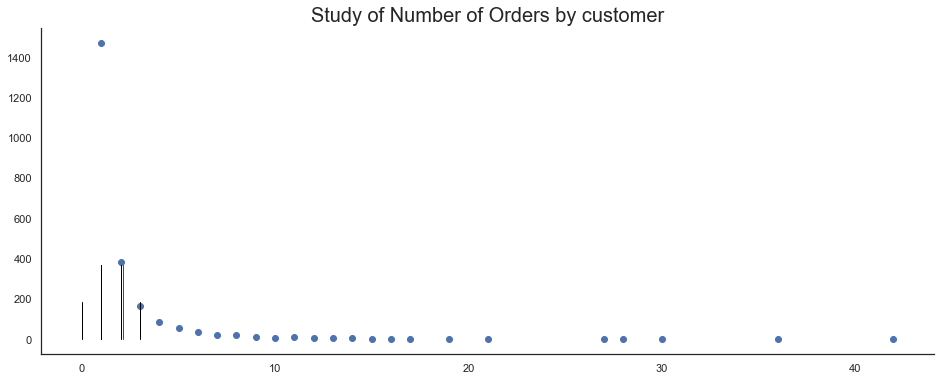

In [233]:

a=df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts().describe()

maxval=df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts().value_counts().values.max()
linwhismin=a[4]-(a[6]-a[4])
linwhismax=a[6]+(a[6]-a[4])

sns.set()
sns.set_style("white")
fig, ax1 = plt.subplots(1, figsize=(16,6))
#ax1.scatter(df1["DocNumber"].value_counts().value_counts(ascending=True).index,df1["DocNumber"].value_counts().value_counts(ascending=True).values )
ax1.scatter(df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts().value_counts(ascending=True).index,
            df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts().value_counts(ascending=True).values )

plt.plot([a[1],a[1]], [0, maxval/4],color="red", linewidth=1) #plot mean
plt.plot([linwhismin,linwhismin], [0, maxval/8],color="black", linewidth=1) #plot 1st whisker
plt.plot([a[4],a[4]], [0, maxval/4],color="black", linewidth=1) #plot 1st quart
plt.plot([a[5],a[5]], [0, maxval/4],color="black", linewidth=1) #plot median
plt.plot([a[6],a[6]], [0, maxval/4],color="black", linewidth=1) #plot 3rd quart

plt.plot([linwhismax,linwhismax], [0, maxval/8],color="black", linewidth=1) #plot 2nd whisker
ax2.boxplot(df1["DocNumber"].value_counts())
ax1.set_title("Study of Number of Orders by customer", fontsize=20)

sns.despine()
plt.show()

Seems like most of our clients don't reorder, or maybe we are not recordeing their details...

In [248]:
a=df1.loc[df1["IsDelivery"]==1, ].drop_duplicates(subset=["DocNumber"]).CustomerID.value_counts()
print("number of customers with 1 order is: " + str(a.where(a==1).count())+
      " about " +str(round(a.where(a==1).count()/2315*100,2) )+"% of customers")
print("number of customers with 2 or less orders is: " + str(a.where(a<=2).count())+
      " about " +str(round(a.where(a<=2).count()/2315*100,2) )+"% of customers")
print("number of customers with 3 or less orders is: " + str(a.where(a<=3).count())+
      " about " +str(round(a.where(a<=3).count()/2315*100,2) )+"% of customers")


number of customers with 1 order is: 1473 about 63.63% of customers
number of customers with 2 or less orders is: 1857 about 80.22% of customers
number of customers with 3 or less orders is: 2021 about 87.3% of customers


## Ver Cities

## Ver Produtos

In [ ]:
df1 Qty	TotalAmount

In [276]:
#df1.groupby(["ProductFamily"])["Qty"].sum()
familydf=pd.concat([df1.groupby(["ProductFamily"])["Qty"].sum(), df1.groupby(["ProductFamily"])["TotalAmount"].sum()], axis=1, sort=False)
#familydf.concat(familydf[])
familydf

,Qty,TotalAmount
ProductFamily,,
BREADS IND,2047.0,7041.20
DESSERT,3041.0,411.30
DESSERT IND,84.0,424.90
DRINKS,13592.0,38553.70
EXTRAS,5129.0,5330.30
HOLDS,1237.0,0.00
JAP SUSHI,4183.0,35243.95
MAIN IND,3389.0,44327.60
MEAT,9226.0,114028.00


In [282]:
##Continuar

familydf=pd.concat([familydf["TotalAmount","Qty"],(familydf["TotalAmount"]/familydf["Qty"]]), axis=1, sort=False)

SyntaxError: invalid syntax (<ipython-input-282-39e4bd04a645>, line 1)

In [266]:
    df1[(df1.DocNumber==110044742018) & (df1.ProductDesignation=='COKE')]

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
66536,110044742018,COKE,DRINKS,1.0,3.0,2018-10-28 14:58:25.000,2,0,11,0,NaN,NaN
66541,110044742018,COKE,DRINKS,1.0,3.0,2018-10-28 14:58:25.000,2,0,11,0,NaN,NaN
66544,110044742018,COKE,DRINKS,1.0,3.0,2018-10-28 14:58:25.000,2,0,11,0,NaN,NaN
66545,110044742018,COKE,DRINKS,1.0,3.0,2018-10-28 14:58:25.000,2,0,11,0,NaN,NaN


In [14]:
# pedidos de delivery - 31 248
df_IsDelivery = df1[df1.IsDelivery==1]

# pedidos de dine inn - 52 861
df_DineInn = df1[df1.IsDelivery==0]

In [15]:
# delivery só tem nulls no customer since e são 2106
df_IsDelivery.isnull().sum()

DocNumber                0
ProductDesignation       0
ProductFamily            0
Qty                      0
TotalAmount              0
InvoiceDateHour          0
EmployeeID               0
IsDelivery               0
Pax                      0
CustomerID               0
CustomerCity             0
CustomerSince         2106
dtype: int64

In [16]:
# quando é delivery é sempre 1 pessoa "à mesa"
df_IsDelivery.Pax.value_counts()

1    31248
Name: Pax, dtype: int64

In [17]:
# os DINE INN não têm customer city nem customer since (são null), nem customer id (é sempre 0)
df_DineInn.isnull().sum()

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         52861
dtype: int64

In [18]:
df_DineInn.CustomerID.value_counts()

0    52861
Name: CustomerID, dtype: int64

In [22]:
Products = list(df1.ProductDesignation.unique())

In [23]:
SpRequestsNO = []
for product in Products:
    if ' NO ' in product:
        product_n = product.strip()
        SpRequestsNO.append(product_n)
        
SpRequestsNO

['NO MEAT',
 'NO MUSHROOMS',
 'NO ONION',
 'NO EGG',
 'NO SAUCE',
 'NO BEANSPROUTS',
 'NO CHILLY',
 'NO PRAWNS',
 'NO PORK',
 'NO BABY CORN']

In [24]:
SpRequestsEXTRA = []
for product in Products:
    if ' EXTRA ' in product:
        product_n = product.strip()
        SpRequestsEXTRA.append(product_n)
        
SpRequestsEXTRA

['EXTRA SAUCE', 'EXTRA PANCAKES', 'EXTRA SALAD']

In [27]:
df_IsDelivery.describe(include='all')
# há uma delivery charge no product designation

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
count,3.124800e+04,31248,31248,31248.000000,31248,31248,31248.000000,31248.0,31248.0,31248.000000,31248,29142
unique,NaN,146,21,NaN,148,4866,NaN,NaN,NaN,NaN,17,2109
top,NaN,DELIVERY CHARGE,STARTERS,NaN,"10,10",2018-04-14 20:23:46.000,NaN,NaN,NaN,NaN,EGKOMI,2005-12-06 15:00:00.000
freq,NaN,3892,6803,NaN,2955,26,NaN,NaN,NaN,NaN,9423,1164
mean,3.191614e+11,NaN,NaN,1.167307,NaN,NaN,3.725358,1.0,1.0,34003.921147,NaN,NaN
std,2.809416e+09,NaN,NaN,0.728986,NaN,NaN,3.827634,0.0,0.0,23883.130466,NaN,NaN
min,3.100000e+11,NaN,NaN,1.000000,NaN,NaN,2.000000,1.0,1.0,6.000000,NaN,NaN
25%,3.200085e+11,NaN,NaN,1.000000,NaN,NaN,2.000000,1.0,1.0,8948.000000,NaN,NaN
50%,3.200214e+11,NaN,NaN,1.000000,NaN,NaN,2.000000,1.0,1.0,38764.000000,NaN,NaN
75%,3.200334e+11,NaN,NaN,1.000000,NaN,NaN,5.000000,1.0,1.0,56303.000000,NaN,NaN


In [28]:
df_DineInn.describe(include='all')

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
count,5.286100e+04,52861,52861,52861.000000,52861,52861,52861.000000,52861.0,52861.000000,52861.0,0,0
unique,NaN,244,26,NaN,319,6281,NaN,NaN,NaN,NaN,0,0
top,NaN,MINERAL WATER 1.5LT,DRINKS,NaN,"3,00",2018-10-28 14:58:25.000,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7052,11337,NaN,9727,46,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.112222e+11,NaN,NaN,1.316793,NaN,NaN,3.511928,0.0,4.660884,0.0,NaN,NaN
std,3.239736e+09,NaN,NaN,1.017544,NaN,NaN,3.590845,0.0,4.090300,0.0,NaN,NaN
min,1.100000e+11,NaN,NaN,1.000000,NaN,NaN,2.000000,0.0,0.000000,0.0,NaN,NaN
25%,1.100149e+11,NaN,NaN,1.000000,NaN,NaN,2.000000,0.0,2.000000,0.0,NaN,NaN
50%,1.100308e+11,NaN,NaN,1.000000,NaN,NaN,2.000000,0.0,4.000000,0.0,NaN,NaN
75%,1.100469e+11,NaN,NaN,1.000000,NaN,NaN,5.000000,0.0,6.000000,0.0,NaN,NaN


In [29]:
df_IsDelivery[df_IsDelivery.ProductDesignation=='DELIVERY CHARGE']

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
54,320000012018,DELIVERY CHARGE,EXTRAS,1.0,"1,00",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
62,320000022018,DELIVERY CHARGE,EXTRAS,1.0,"1,00",2018-01-01 19:12:28.000,2,1,1,1072,LEYKOSIA,2016-03-10 20:52:43.220
69,320000032018,DELIVERY CHARGE,EXTRAS,1.0,"1,70",2018-01-01 20:13:42.000,2,1,1,45483,LAKATAMEIA,2018-01-01 19:56:39.830
73,320000042018,DELIVERY CHARGE,EXTRAS,1.0,"1,00",2018-01-01 20:13:54.000,2,1,1,45485,STROBOLOS,2018-01-01 20:02:27.267
82,320000052018,DELIVERY CHARGE,EXTRAS,1.0,"1,70",2018-01-01 20:14:07.000,2,1,1,45351,LAKATAMEIA,2017-12-02 20:06:33.597
...,...,...,...,...,...,...,...,...,...,...,...,...
84083,320044482018,DELIVERY CHARGE,EXTRAS,1.0,"1,70",2018-12-31 21:13:39.000,2,1,1,31522,LEYKOSIA,2018-12-31 21:12:53.553
84093,320044502018,DELIVERY CHARGE,EXTRAS,1.0,"1,70",2018-12-31 21:23:34.000,2,1,1,33294,EGKOMI,2018-12-31 21:22:58.913
84098,320044512018,DELIVERY CHARGE,EXTRAS,1.0,"1,70",2018-12-31 21:54:08.000,2,1,1,34206,STROBOLOS,2018-12-31 21:53:32.487
84104,320044522018,DELIVERY CHARGE,EXTRAS,1.0,"1,70",2018-12-31 21:55:18.000,2,1,1,33349,STROBOLOS,2018-12-31 21:38:08.850


In [31]:
df_IsDelivery.DocNumber.unique().shape
# nem todos os invoices de delivery têm delivery charge
#takeaway???

(4866,)